# Q1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import stats
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Cutlets.csv')
df.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [3]:
df.rename(columns={'Unit A':'Unit_A','Unit B':'Unit_B'},inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit_A  35 non-null     float64
 1   Unit_B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [5]:
df.describe()

,Unit_A,Unit_B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


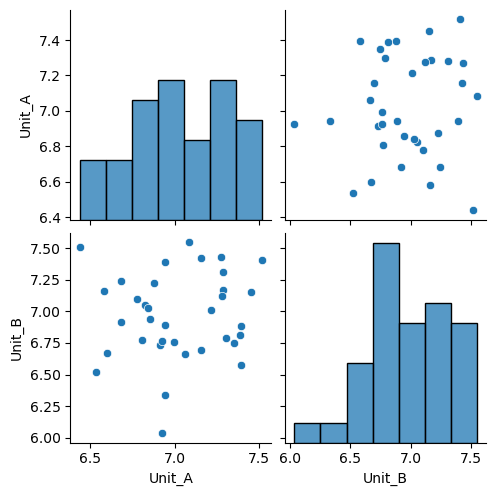

In [6]:
sns.pairplot(df)

Text(0.5, 1.0, 'Unit_B')

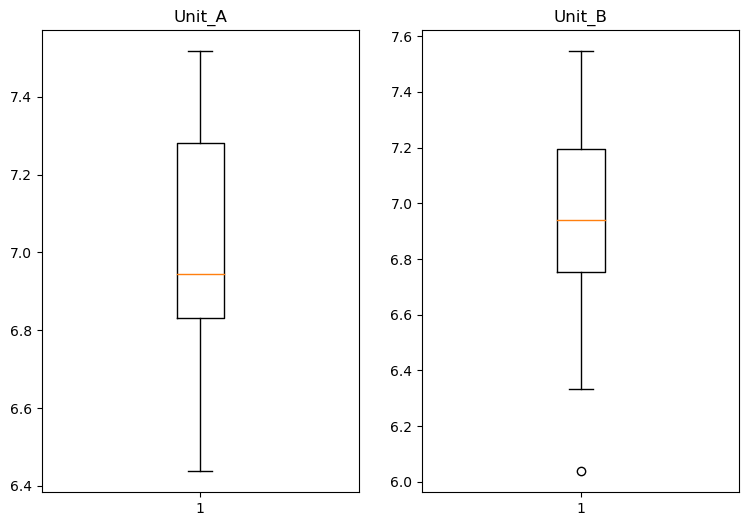

In [7]:
plt.subplots(figsize=(9,6))
plt.subplot(121)
plt.boxplot(df.Unit_A)
plt.title('Unit_A')
plt.subplot(122)
plt.boxplot(df.Unit_B)
plt.title('Unit_B')


Text(0.5, 1.0, 'Unit_B')

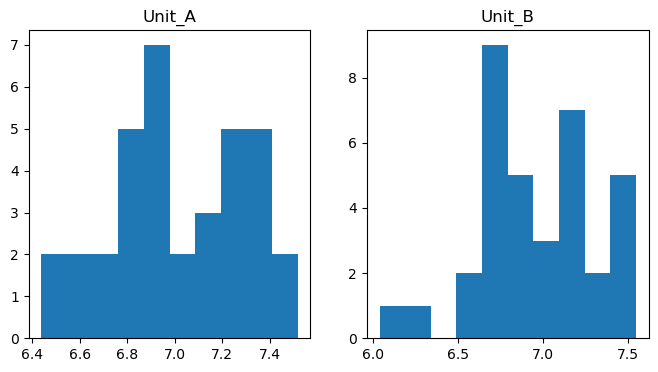

In [8]:
plt.subplots(figsize=(8,4))
plt.subplot(121)
plt.hist(df.Unit_A)
plt.title('Unit_A')
plt.subplot(122)
plt.hist(df.Unit_B)
plt.title('Unit_B')

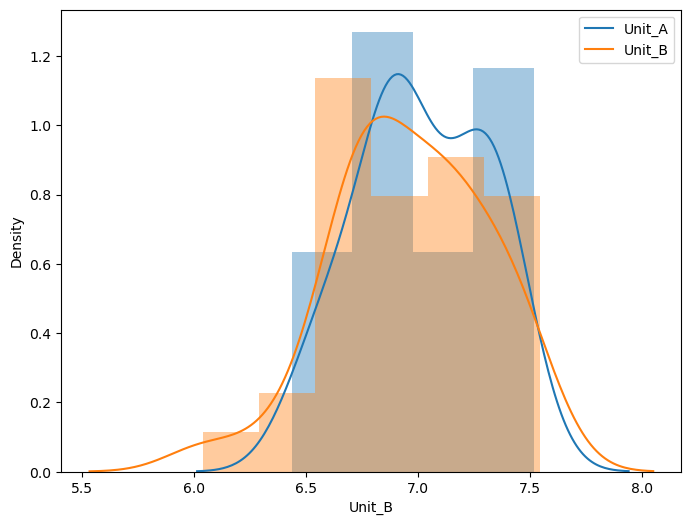

In [9]:
plt.figure(figsize=(8,6))
labels= ['Unit_A','Unit_B']
sns.distplot(df.Unit_A)
sns.distplot(df.Unit_B)
plt.legend(labels)

In [10]:
stats.ttest_ind(df['Unit_A'],df['Unit_B'])

Ttest_indResult(statistic=0.7228688704678063, pvalue=0.4722394724599501)

In [11]:
import statsmodels.api as sm

a=0.05

x=sm.stats.ttest_ind(df.Unit_A,df.Unit_B)[1]
print(x)
print(round(x,3))
if x>a:
    print(f'Accept null hypothesis\n--------------------------')
else:
    print(f'Failed to accept the null hypothesis\n-------------------')

0.47223947245995745
0.472
Accept null hypothesis
--------------------------


### ANS:
### In this test  conclude that i Accept null hypothesis or fail to reject the null hypothesis because of the p-value is greater than alpha value

# Q2

In [12]:
q2= pd.read_csv('LabTAT.csv')
q2.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [13]:
q2.rename(columns={'Laboratory 1':'Laboratory_1','Laboratory 2':'Laboratory_2',
                   'Laboratory 3':'Laboratory_3','Laboratory 4':'Laboratory_4'},inplace=True)

In [14]:
q2.shape

(120, 4)

### EDA

In [15]:
q2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory_1  120 non-null    float64
 1   Laboratory_2  120 non-null    float64
 2   Laboratory_3  120 non-null    float64
 3   Laboratory_4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


In [16]:
q2.describe()

,Laboratory_1,Laboratory_2,Laboratory_3,Laboratory_4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [17]:
q2.isnull().sum()

Laboratory_1    0
Laboratory_2    0
Laboratory_3    0
Laboratory_4    0
dtype: int64

In [18]:
q2.duplicated().sum()

0

### Data Visualization

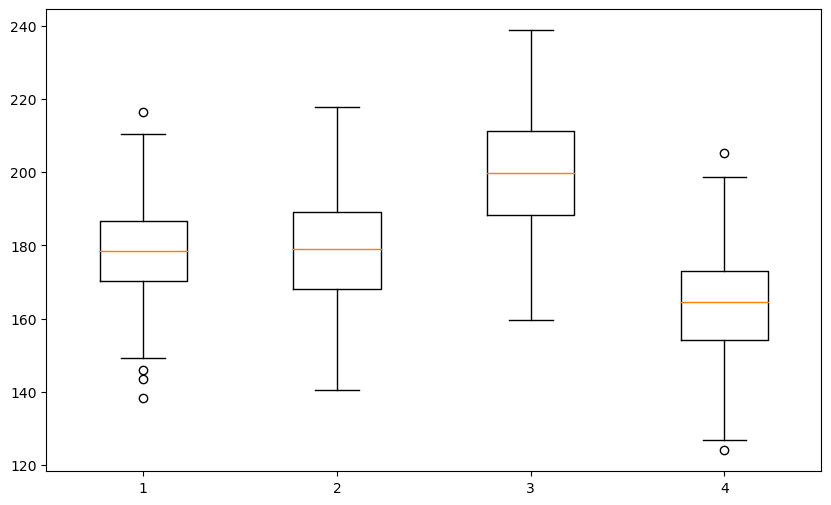

In [19]:
plt.figure(figsize=(10,6))
plt.boxplot(q2);

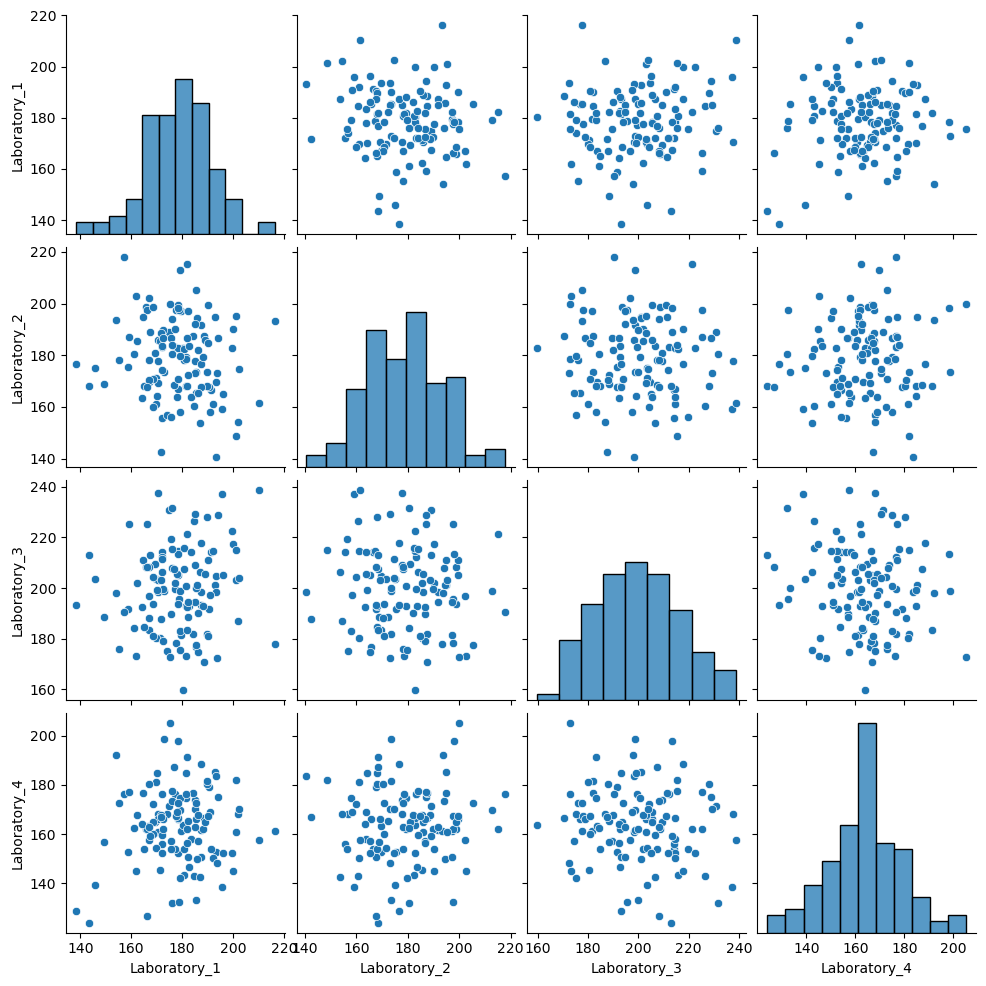

In [20]:
sns.pairplot(q2)

Text(0.5, 1.0, 'Laboratory_2')

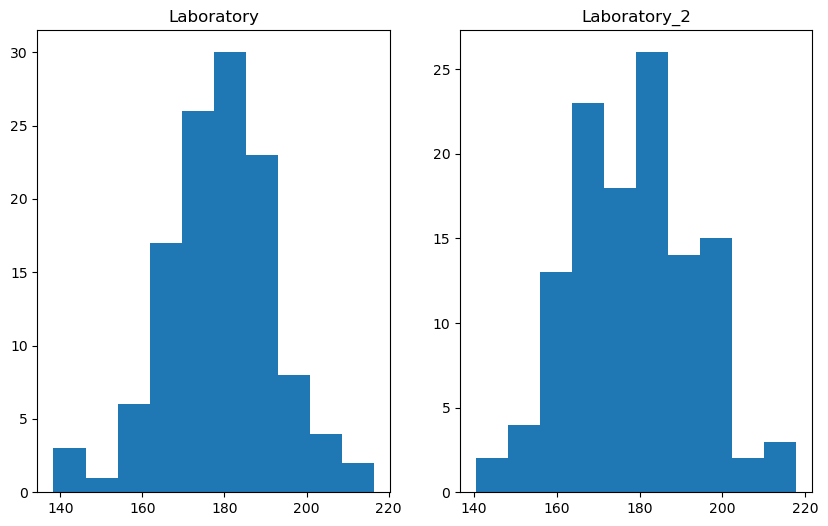

In [21]:
plt.subplots(figsize=(10,6))
plt.subplot(121)
plt.hist(q2.Laboratory_1)
plt.title('Laboratory')
plt.subplot(122)
plt.hist(q2.Laboratory_2)
plt.title('Laboratory_2') 

Text(0.5, 1.0, 'Laboratory_4')

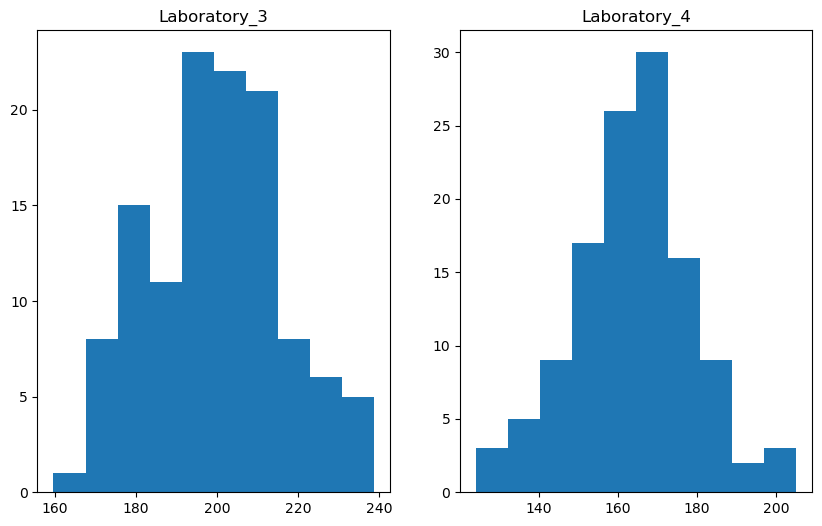

In [22]:
plt.subplots(figsize=(10,6))
plt.subplot(121)
plt.hist(q2.Laboratory_3)
plt.title('Laboratory_3') 
plt.subplot(122)
plt.hist(q2.Laboratory_4)
plt.title('Laboratory_4') 

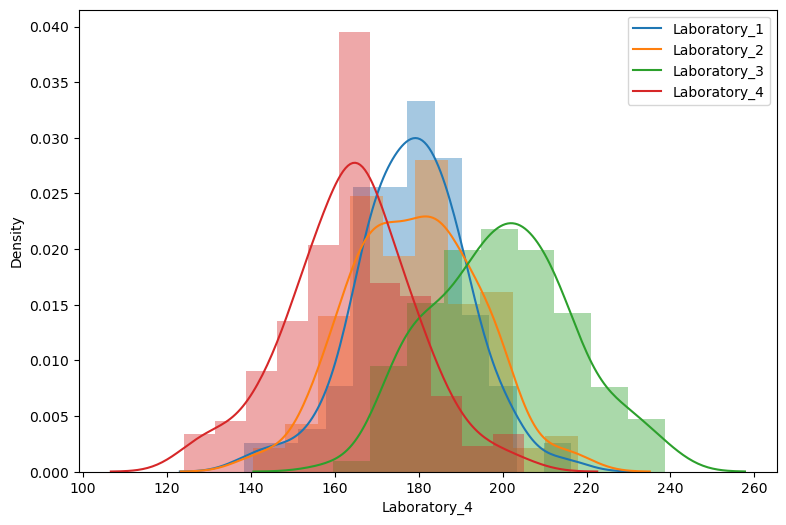

In [23]:
plt.figure(figsize=(9,6))
labels= ['Laboratory_1','Laboratory_2','Laboratory_3','Laboratory_4']
sns.distplot(q2.Laboratory_1)
sns.distplot(q2.Laboratory_2)
sns.distplot(q2.Laboratory_3)
sns.distplot(q2.Laboratory_4)
plt.legend(labels)

In [24]:
stats.f_oneway(q2.Laboratory_1,q2.Laboratory_2,q2.Laboratory_3,q2.Laboratory_4)

F_onewayResult(statistic=118.70421654401437, pvalue=2.1156708949992414e-57)

In [25]:
a=0.05

x=stats.f_oneway(q2.Laboratory_1,q2.Laboratory_2,q2.Laboratory_3,q2.Laboratory_4)[1]
print(x)
print(round(x,5))
if x>a:
    print(f'Accept null hypothesis\n--------------------------')
else:
    print(f'Reject the null hypothesis\n-------------------')

2.1156708949992414e-57
0.0
Reject the null hypothesis
-------------------


### ANS:
### In this test  conclude that  Reject the null hypothesis because of the alpha value is greater than p-value

# Q3

In [26]:
q3 = pd.read_csv('BuyerRatio.csv',index_col=[0])
q3

,East,West,North,South
Observed Values,,,,
Males,50,142,131,70
Females,435,1523,1356,750


In [27]:
q3.shape

(2, 4)

In [28]:
q3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, Males to Females
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   East    2 non-null      int64
 1   West    2 non-null      int64
 2   North   2 non-null      int64
 3   South   2 non-null      int64
dtypes: int64(4)
memory usage: 80.0+ bytes


In [29]:
q3.describe()

,East,West,North,South
count,2.000000,2.000000,2.000000,2.000000
mean,242.500000,832.500000,743.500000,410.000000
std,272.236111,976.514465,866.205807,480.832611
min,50.000000,142.000000,131.000000,70.000000
25%,146.250000,487.250000,437.250000,240.000000
50%,242.500000,832.500000,743.500000,410.000000
75%,338.750000,1177.750000,1049.750000,580.000000
max,435.000000,1523.000000,1356.000000,750.000000


### Data Visualization

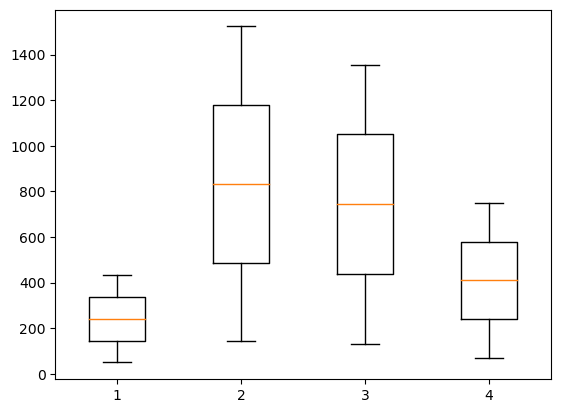

In [30]:
plt.boxplot(q3);

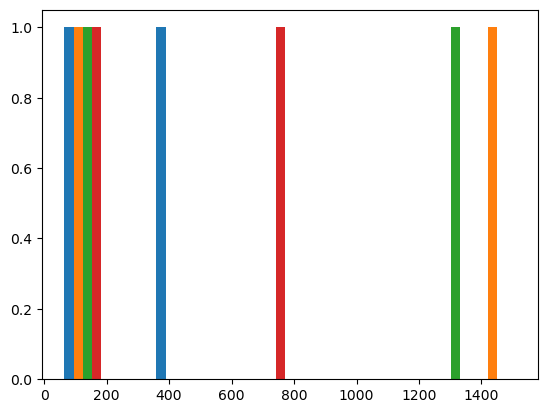

In [31]:
plt.hist(q3);

<Axes: ylabel='Density'>

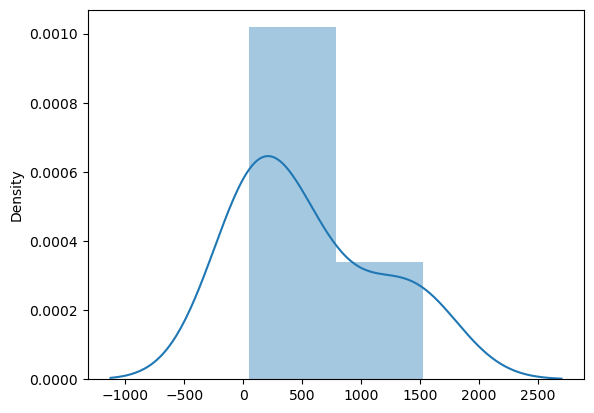

In [32]:
sns.distplot(q3)

In [33]:
st.chi2_contingency(q3)

Chi2ContingencyResult(statistic=1.595945538661058, pvalue=0.6603094907091882, dof=3, expected_freq=array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
       [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

In [34]:
a= st.chi2_contingency(q3).expected_freq
expected_value=a.flatten()

In [35]:
observed_value = q3.to_numpy().flatten()
observed_value 

array([  50,  142,  131,   70,  435, 1523, 1356,  750], dtype=int64)

In [36]:
st.chisquare(observed_value,expected_value)

Power_divergenceResult(statistic=1.595945538661058, pvalue=0.9788009521675839)

In [37]:
st.chisquare(observed_value,expected_value,)[1]

0.9788009521675839

In [38]:
a=0.05

x = st.chisquare(observed_value,expected_value,)[1]
print('p-value =',np.round(x,3))
if x<a:
     print('Reject the null hypothesis\n--------------------')
else:
      print('Fail to reject the null hypothesis\n------------')

p-value = 0.979
Fail to reject the null hypothesis
------------


### ANS:
### In this test  conclude that i Accept null hypothesis or fail to reject the null hypothesis because of the p-value is greater than alpha value

## Q4

In [39]:
q4 = pd.read_csv('Costomer+OrderForm.csv')
q4.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [40]:
q4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


In [41]:
q4.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [42]:
print(q4['Phillippines'].value_counts(),'\n',q4['Indonesia'].value_counts(),'\n',q4['Malta'].value_counts(),'\n',q4['India'].value_counts())

Error Free    271
Defective      29
Name: Phillippines, dtype: int64 
 Error Free    267
Defective      33
Name: Indonesia, dtype: int64 
 Error Free    269
Defective      31
Name: Malta, dtype: int64 
 Error Free    280
Defective      20
Name: India, dtype: int64


In [43]:
observed =[[271,267,269,280],[29,33,31,20]]
#np.array(observed)
#observe = observed.flatten()

In [44]:
observe = np.array(observed).flatten()
#observe = observed.flatten()

In [45]:
st.chi2_contingency(observed)

Chi2ContingencyResult(statistic=3.858960685820355, pvalue=0.2771020991233135, dof=3, expected_freq=array([[271.75, 271.75, 271.75, 271.75],
       [ 28.25,  28.25,  28.25,  28.25]]))

In [46]:
expected = st.chi2_contingency(observed).expected_freq
np.array(expected)
expect =expected.flatten()
expect

array([271.75, 271.75, 271.75, 271.75,  28.25,  28.25,  28.25,  28.25])

In [47]:
st.chisquare(observe,expect,ddof=3)

Power_divergenceResult(statistic=3.858960685820355, pvalue=0.4254298144535761)

In [48]:
st.chisquare(observe,expect,ddof=3)[1]

0.4254298144535761

In [49]:
a =0.05

pvalue = st.chisquare(observe,expect,ddof=3)[1]
print('p-value =',pvalue)
if pvalue < a:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis\n-----------')

p-value = 0.4254298144535761
Fail to reject the null hypothesis
-----------


### ANS:
### In this test  conclude that i Accept null hypothesis or fail to reject the null hypothesis because of the p-value is greater than alpha value